In [1]:
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"

In [2]:
!echo $PATH

/data/students_home/amoscatelli/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/local/cuda/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin


# Install Detectron2

In [ ]:
!pip3 install -U torch torchvision
!pip3 install git+https://github.com/facebookresearch/fvcore.git
!pip3 install pycocotools

  Using cached https://files.pythonhosted.org/packages/88/95/90e8c4c31cfc67248bf944ba42029295b77159982f532c5689bcfe4e9108/torch-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9b/e2/2b1f88a363ae37b2ba52cfb785ddfb3dd5f7e7ec9459e96fd8299b84ae39/torchvision-0.4.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/10/5c/0e94e689de2476c4c5e644a3bd223a1c1b9e2bdb7c510191750be74fa786/Pillow-6.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/26/32b8464df2a97e6dd1b656ed26b2c194606c16fe163c695a992b36c11cdf/six-1.13.0-py2.py3-none-any.whl


In [2]:
import torch, torchvision
torch.__version__

'1.3.1'

In [5]:
import os
from os.path import exists #, join, basename, splitext

# install Anaconda Python 2.7 to control the dependencies
# see for more info: 
if not exists(PROJECT_FOLDER+'/detectron2_repo'):
    !cd $PROJECT_FOLDER && git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip3 install -e $PROJECT_FOLDER/detectron2_repo

Obtaining file:///data/students_home/amoscatelli/Desktop/actionAnalysis/detectron2_repo
  Using cached https://files.pythonhosted.org/packages/10/5c/0e94e689de2476c4c5e644a3bd223a1c1b9e2bdb7c510191750be74fa786/Pillow-6.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2f/51/9d613d67a8561a0cdf696c3909870f157ed85617fea3cff769bb7de09ef7/yacs-0.1.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/49/334e279caa3231255725c8e860fa93e72083567625573421db8875846c14/cloudpickle-1.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/b0/6d63e33dbf5935dccd334ee2b83cc4d3828817de6faaa3a3f7f5b8cc5141/tqdm-4.40.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Test Detectron2 keypoints on image

WARNING [12/17 10:28:52 d2.config.compat]: Config '/data/students_home/amoscatelli/Desktop/actionAnalysis/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


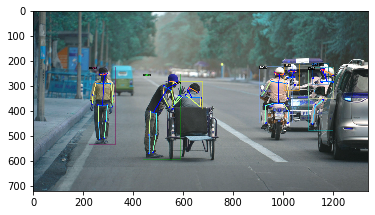

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
framesFolder = PROJECT_FOLDER+"/images"
cfg = get_cfg()
# cfg.merge_from_file(PROJECT_FOLDER+"/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
# cfg.MODEL.WEIGHTS = "detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl"

cfg.merge_from_file(PROJECT_FOLDER+"/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl"

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
predictor = DefaultPredictor(cfg)
fileList = os.listdir(framesFolder)
fileList.sort()
for fileName in fileList:
    im = cv2.imread(os.path.join(framesFolder,fileName))
    # im = cv2.resize(im, (960, 540)) 
#     scale_percent = 100 # percent of original size
#     width = int(im.shape[1] * scale_percent / 100)
#     height = int(im.shape[0] * scale_percent / 100)
#     dim = (width, height)
    # resize image
#     im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA) 
#     im = cv2.resize(im, (1500, 2282))        
    outputs = predictor(im)
    v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(v.get_image()[:, :, ::-1])
#     print(outputs)
    # cv2_imshow(im)

In [6]:
!nvidia-smi

Tue Dec 10 10:01:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 430.50       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro K600         Off  | 00000000:02:00.0  On |                  N/A |
| 25%   46C    P8    N/A /  N/A |    111MiB /   980MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX TIT...  Off  | 00000000:03:00.0 Off |                  N/A |
| 22%   45C    P8    17W / 250W |   1230MiB / 12212MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:
 !python -c 'import torch; from torch.utils.cpp_extension import CUDA_HOME; print(torch.cuda.is_available(), CUDA_HOME)'

(True, u'/usr/local/cuda')


In [ ]:
# install dependencies
!pip3 install -U torch torchvision cython
!pip3 install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

  Using cached https://files.pythonhosted.org/packages/88/95/90e8c4c31cfc67248bf944ba42029295b77159982f532c5689bcfe4e9108/torch-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9b/e2/2b1f88a363ae37b2ba52cfb785ddfb3dd5f7e7ec9459e96fd8299b84ae39/torchvision-0.4.2-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 2.1MB 729kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/10/5c/0e94e689de2476c4c5e644a3bd223a1c1b9e2bdb7c510191750be74fa786/Pillow-6.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/26/32b8464df2a97e6dd1b656ed26b2c194606c16fe163c695a992b36c11cdf/six-1.13.0-py2.py3-none-any.whl


In [ ]:
# !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
# !pip install -e detectron2_repo